# Using "student-por.csv" dataset

In [36]:
import pandas as pd
import os

# Define the path to your folder
path = '../data/student-por.csv'

# Load the Portuguese students
df_por = pd.read_csv(path, sep=';')

# Check if it loaded correctly
print(f"Portuguese Shape: {df_por.shape}")

Portuguese Shape: (649, 33)


In [37]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [38]:
# Check data types for all columns
print(df_por.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [39]:
# Count missing values per column
missing_values = df_por.isnull().sum()

# Display the counts
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [40]:
#Cleaning Data

In [41]:
# Mapping for snake_case (PEP 8 compliance)
# This addresses CamelCase (Pstatus), combined words (studytime), and lowercase (G1)
rename_map = {
    'famsize': 'fam_size',
    'Pstatus': 'p_status',
    'Medu': 'm_edu',
    'Fedu': 'f_edu',
    'Mjob': 'm_job',
    'Fjob': 'f_job',
    'traveltime': 'travel_time',
    'studytime': 'study_time',
    'schoolsup': 'school_sup',
    'famsup': 'fam_sup',
    'famrel': 'fam_rel',
    'freetime': 'free_time',
    'goout': 'go_out',
    'Dalc': 'd_alc',
    'Walc': 'w_alc',
    'G1': 'g1',
    'G2': 'g2',
    'G3': 'g3'
}

# Rename columns
df_por.rename(columns=rename_map, inplace=True)

# Ensure all other columns are lowercase (just in case)
df_por.columns = [c.lower() for c in df_por.columns]

# 1. Check for exact row duplicates
exact_duplicates = df_por.duplicated().sum()

# 2. Check for duplicate student profiles (ignoring grades)
profile_cols = [col for col in df_por.columns if col not in ['g1', 'g2', 'g3']]
profile_duplicates = df_por.duplicated(subset=profile_cols).sum()

print(f"Dataset Shape: {df_por.shape}")
print(f"Exact Duplicate Rows: {exact_duplicates}")
print(f"Duplicate Student Profiles (ignoring grades): {profile_duplicates}")
print("\nCleaned Column Names:")
print(df_por.columns.tolist())

# Save the cleaned data
df_por.to_csv('student_por_cleaned_n1.csv', index=False)

Dataset Shape: (649, 33)
Exact Duplicate Rows: 0
Duplicate Student Profiles (ignoring grades): 0

Cleaned Column Names:
['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'd_alc', 'w_alc', 'health', 'absences', 'g1', 'g2', 'g3']


In [42]:
df_por.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,fam_rel,free_time,go_out,d_alc,w_alc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [43]:
#Load Cleaned Dataset

In [44]:
import pandas as pd
import os

# Define the path to the cleaned data in folder
path = '../notebooks/student_por_cleaned_n1.csv'

# Load the Cleaned Portuguese students
df_por = pd.read_csv(path, sep=',')

# Check if it loaded correctly
print(f"CLeaned Portuguese Shape: {df_por.shape}")
df_por.head()


CLeaned Portuguese Shape: (649, 33)


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,fam_rel,free_time,go_out,d_alc,w_alc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [45]:
#Split into Categorical and Numerical

In [46]:
# Separate Numerical columns
# includes: age, absences, g1, g2, g3, and the 1-5 scales (medu, fedu, travel_time, etc.)
df_numeric = df_por.select_dtypes(include=['number'])

# Separate Categorical columns
# includes: school, sex, address, m_job, f_job, reason, guardian, and all yes/no columns
df_categorical = df_por.select_dtypes(include=['object'])

print(f"Numerical columns: {df_numeric.shape[1]}")
print(f"Categorical columns: {df_categorical.shape[1]}")

Numerical columns: 16
Categorical columns: 17


In [47]:
#verify which columns went where

In [48]:
print("--- Numerical Features ---")
print(df_numeric.columns.tolist())

print("\n--- Categorical Features ---")
print(df_categorical.columns.tolist())

--- Numerical Features ---
['age', 'm_edu', 'f_edu', 'travel_time', 'study_time', 'failures', 'fam_rel', 'free_time', 'go_out', 'd_alc', 'w_alc', 'health', 'absences', 'g1', 'g2', 'g3']

--- Categorical Features ---
['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [49]:
#To prepare the Portuguese dataset for analysis or machine learning, apply different techniques: Scaling for numerical data and Encoding for categorical data.

In [50]:
# 1. Binary Encoding (Yes/No to 1/0)
binary_cols = [col for col in df_categorical.columns if df_por[col].nunique() == 2]
for col in binary_cols:
    df_por[col] = df_por[col].astype('category').cat.codes

# 2. One-Hot Encoding (Multiple categories)
nominal_cols = [col for col in df_categorical.columns if df_por[col].nunique() > 2]
df_por = pd.get_dummies(df_por, columns=nominal_cols, drop_first=True)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# We usually scale everything except the target variable (G3)
features_to_scale = df_numeric.columns.difference(['g3'])

df_por[features_to_scale] = scaler.fit_transform(df_por[features_to_scale])

In [52]:
#ML model for predicting student performance
#define the Target ( y ) and Features ( X ) and split the data into Training and Testing sets?

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Identify column types automatically
numeric_cols = df_por.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_por.select_dtypes(include=['object']).columns.tolist()

# 2. Apply One-Hot Encoding to categorical data
# drop_first=True prevents the "Dummy Variable Trap" (multicollinearity)
df_final = pd.get_dummies(df_por, columns=categorical_cols, drop_first=True)

# 3. Define Features (X) and Target (y)
# We use 'g3' (final grade) as our target variable
X = df_final.drop('g3', axis=1)
y = df_final['g3']

# 4. Split the data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale the Numerical Features
# We fit the scaler ONLY on the training data to avoid data leakage
scaler = StandardScaler()

# Get only the original numeric columns (excluding the target g3)
cols_to_scale = [c for c in numeric_cols if c != 'g3']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (519, 41)
Testing set size: (130, 41)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [55]:
#Evaluating Performance

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation for Random Forest
mae = mean_absolute_error(y_test, rf_preds)
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
r2 = r2_score(y_test, rf_preds)

print(f"Random Forest Metrics:")
print(f"- MAE: {mae:.2f}")
print(f"- RMSE: {rmse:.2f}")
print(f"- R2 Score: {r2:.2f}")

Random Forest Metrics:
- MAE: 0.76
- RMSE: 1.25
- R2 Score: 0.84


Social Model: Drop G1 & G2

train a "Social Model," we intentionally remove the grade columns ( g1  and  g2 ) from our features.

We drop  g1  and  g2  from our feature set  X . We keep  g3  as our target  y .

In [65]:
# Drop the intermediate grades to focus purely on social/demographic factors
X_social = df_final.drop(['g1', 'g2', 'g3'], axis=1)
y = df_final['g3']

# Split the data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_social, y, test_size=0.2, random_state=42
)

Training and Identifying "Early Warning" Signs

Without the "crutch" of previous grades, the model will rely on social features. We can use a Random Forest to see which lifestyle factors rise to the top.



In [66]:
from sklearn.ensemble import RandomForestRegressor

social_model = RandomForestRegressor(n_estimators=100, random_state=42)
social_model.fit(X_train_s, y_train_s)

# Extract importance
importances = social_model.feature_importances_
indices = np.argsort(importances)[-10:]

To evaluate the "drop" in accuracy, we will compare the Full Model (which includes the "cheating" variables  g1  and  g2 ) against the Social Model (which only uses demographic and lifestyle data).In the world of educational data science, this "drop" represents the transition from a descriptive model (explaining what happened) to a proactive model (forecasting what might happen).

Comparative Analysis Script

The following code runs both models on the same test split and calculates the metrics side-by-side.

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Full Model (with G1 and G2)
full_model = RandomForestRegressor(n_estimators=100, random_state=42)
full_model.fit(X_train, y_train)
full_preds = full_model.predict(X_test)

# 2. Social Model (without G1 and G2)
social_model = RandomForestRegressor(n_estimators=100, random_state=42)
social_model.fit(X_train_s, y_train_s)
social_preds = social_model.predict(X_test_s)

# Evaluation Results
results = {
    "Metric": ["MAE (Average Error)", "R2 Score (Variance Explained)"],
    "Full Model": [mean_absolute_error(y_test, full_preds), r2_score(y_test, full_preds)],
    "Social Model": [mean_absolute_error(y_test_s, social_preds), r2_score(y_test_s, social_preds)]
}

print(pd.DataFrame(results))

                          Metric  Full Model  Social Model
0            MAE (Average Error)    0.756154      2.051769
1  R2 Score (Variance Explained)    0.838707      0.188504


On Full Model

Cross-Validation (The "Check")

Instead of relying on a single train/test split, k-fold Cross-Validation splits the data into  k  parts (usually 5 or 10). It trains the model  k  times, each time using a different part as the "test set."This gives us a much more reliable estimate of how the model will perform on data it has never seen before.

In [68]:
from sklearn.model_selection import cross_val_score

# Check the stability of our Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print(f"Mean R2 Score: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Mean R2 Score: 0.78
Standard Deviation: 0.05


Grid Search (The "Optimization")

Random Forest has "knobs" we can turn, called hyperparameters. Examples include:

n_estimators: How many trees to grow.

max_depth: How deep each tree can go.

min_samples_split: How many samples are needed to split a node.

Grid Search exhaustively tries every combination of these settings to find the "sweet spot" that minimizes error.

In [76]:
from sklearn.model_selection import GridSearchCV

# Define the "Grid" of parameters to try
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit to the training data
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


Evaluating the Fine-Tuned Model

Once Grid Search finishes, it provides the best_estimator_. We compare this tuned model against our original "out-of-the-box" model to see the improvement.

In [77]:
best_rf = grid_search.best_estimator_
tuned_preds = best_rf.predict(X_test)

print(f"Tuned MAE: {mean_absolute_error(y_test, tuned_preds):.2f}")
print(f"Tuned R2: {r2_score(y_test, tuned_preds):.2f}")

Tuned MAE: 0.88
Tuned R2: 0.81


To see which factors influence the Portuguese final grades, we will use a Linear Regression model. The beauty of this model is its interpretability: it assigns a "coefficient" to every feature, which tells us exactly how much that factor pushes the grade up or down.1. Training the Interpretability ModelWe will train this on the Social Model data (excluding G1 and G2) to see which lifestyle and demographic factors have the most "weight."

In [80]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Initialize and train
lr_social = LinearRegression()
lr_social.fit(X_train_s, y_train_s)

# Create a DataFrame to view the coefficients
coefficients = pd.DataFrame({
    'Feature': X_social.columns,
    'Coefficient': lr_social.coef_
})

# Sort by absolute impact
coefficients['Abs_Impact'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Impact', ascending=False)

Evaluation of the Linear Model

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions from the Linear Regression model
lr_social_preds = lr_social.predict(X_test_s)

mae = mean_absolute_error(y_test_s, lr_social_preds)
rmse = np.sqrt(mean_squared_error(y_test_s, lr_social_preds))
r2 = r2_score(y_test_s, lr_social_preds)

print(f"MAE: {mae:.2f} grade points")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 2.16 grade points
RMSE: 2.86
R2 Score: 0.16


In the Portuguese dataset, a Decision Tree will show us the exact thresholds (e.g., "If failures > 0.5 and absences > 10, then the predicted grade is 8").1. Training the Decision TreeWe will train this on our Social Model (without $g1$ and $g2$) to see the behavioral paths.

In [83]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Initialize the tree
# We set max_depth=3 so the tree remains readable
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train_s, y_train_s)

# Predict
dt_preds = dt_model.predict(X_test_s)

Visualizing the Logic
The most powerful part of a Decision Tree is the visualization. It shows the hierarchy of importance.

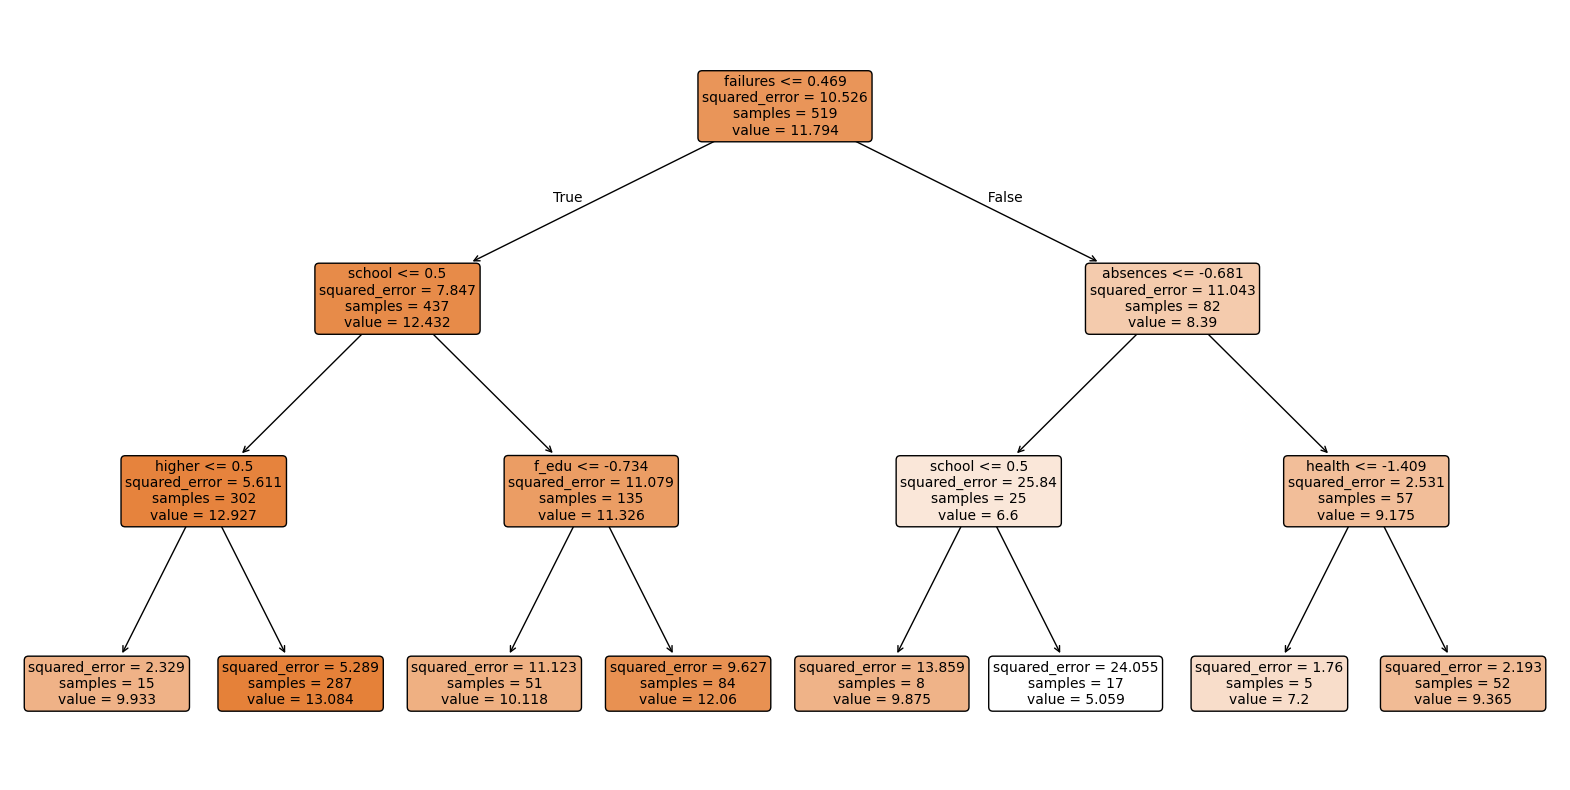

In [84]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X_social.columns, 
          filled=True, 
          fontsize=10,
          rounded=True)
plt.show()

Gradient Boosting model

Training the Gradient Boosting Regressor
We will use Scikit-Learn's GradientBoostingRegressor. We'll set a learning_rate to control how much each tree contributes; a lower rate usually requires more trees but leads to better generalization.

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
# n_estimators: number of boosting stages
# learning_rate: shrinks the contribution of each tree
gb_model = GradientBoostingRegressor(n_estimators=100, 
                                      learning_rate=0.1, 
                                      max_depth=3, 
                                      random_state=42)

# Fit on the Social Model data
gb_model.fit(X_train_s, y_train_s)

# Predict and Evaluate
gb_preds = gb_model.predict(X_test_s)

print(f"Gradient Boosting MAE: {mean_absolute_error(y_test_s, gb_preds):.2f}")
print(f"Gradient Boosting R2: {r2_score(y_test_s, gb_preds):.2f}")

Gradient Boosting MAE: 2.05
Gradient Boosting R2: 0.22


Feature Importance in Gradient Boosting

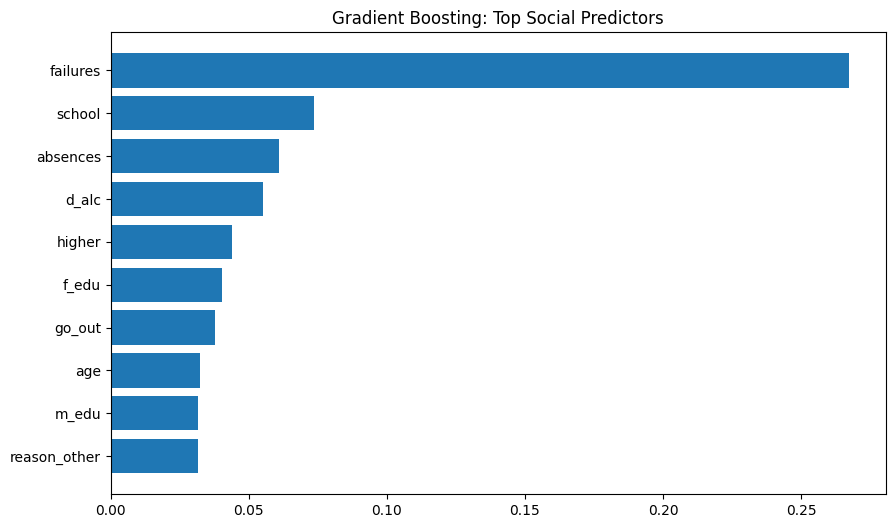

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:] # Top 10

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_social.columns[i] for i in sorted_idx])
plt.title("Gradient Boosting: Top Social Predictors")
plt.show()